## Titanic Machine Learning Project

In [1]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg")

In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
traindf = pd.read_csv('train.csv').set_index('PassengerId')
testdf = pd.read_csv('test.csv').set_index('PassengerId')
submission = pd.read_csv('gender_submission.csv')

In [5]:
traindf.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
traindf

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [8]:
traindf.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
traindf.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dahlberg, Miss. Gerda Ulrika",male,1601,B96 B98,S
freq,1,577,7,4,644


In [10]:
traindf[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [11]:
traindf[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [12]:
traindf[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


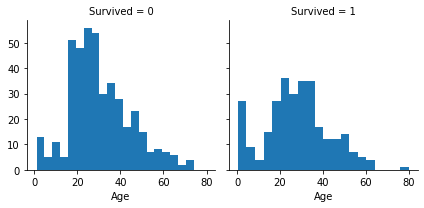

In [13]:
g = sns.FacetGrid(traindf, col='Survived')
g.map(plt.hist, 'Age', bins=20)

c:\users\waris\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


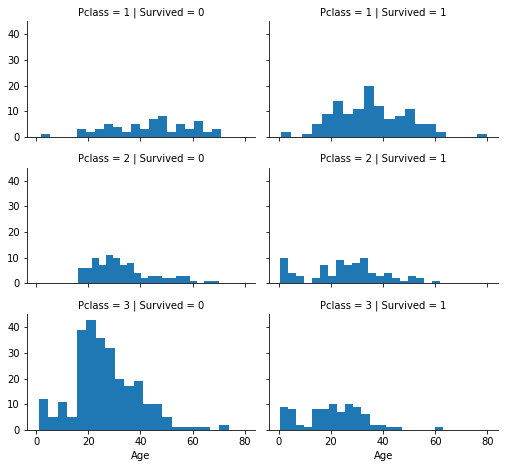

In [14]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(traindf, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', bins=20)
grid.add_legend()

c:\users\waris\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\waris\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\users\waris\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:650: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


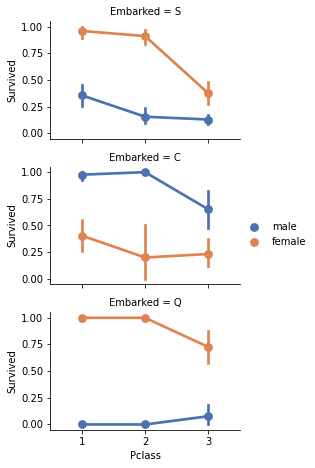

In [15]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(traindf, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

c:\users\waris\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\waris\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


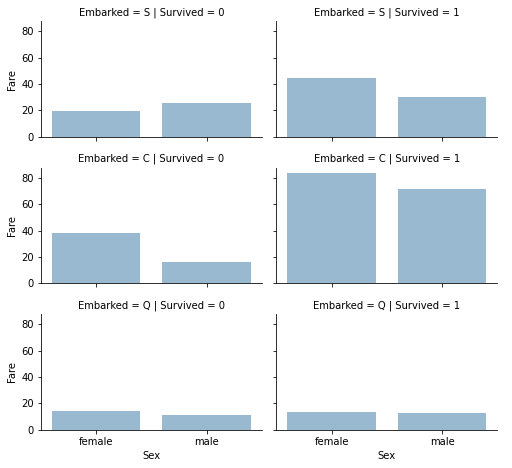

In [16]:
grid = sns.FacetGrid(traindf, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [17]:
print("Before", traindf.shape, testdf.shape)

traindf = traindf.drop(['Ticket', 'Cabin'], axis=1)
testdf = testdf.drop(['Ticket', 'Cabin'], axis=1)
combine = [traindf, testdf]

print("After", traindf.shape, testdf.shape, combine[0].shape, combine[1].shape)

Before (891, 11) (418, 10)
After (891, 9) (418, 8) (891, 9) (418, 8)


In [18]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(traindf['Title'], traindf['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [19]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
traindf[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [20]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

traindf.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [21]:
traindf = traindf.drop(['Name'], axis=1)
testdf = testdf.drop(['Name'], axis=1)
combine = [traindf, testdf]
traindf.shape, testdf.shape

((891, 9), (418, 8))

In [22]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

traindf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,S,1
2,1,1,1,38.0,1,0,71.2833,C,3
3,1,3,1,26.0,0,0,7.9250,S,2
4,1,1,1,35.0,1,0,53.1000,S,3
5,0,3,0,35.0,0,0,8.0500,S,1


c:\users\waris\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


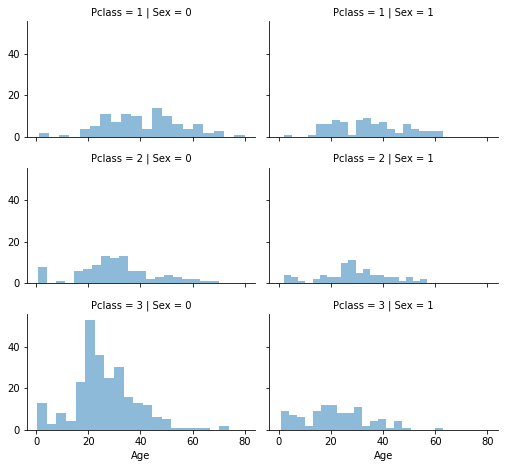

In [23]:
grid = sns.FacetGrid(traindf, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [24]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [25]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

traindf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,,
1,0,3,0,22,1,0,7.2500,S,1
2,1,1,1,38,1,0,71.2833,C,3
3,1,3,1,26,0,0,7.9250,S,2
4,1,1,1,35,1,0,53.1000,S,3
5,0,3,0,35,0,0,8.0500,S,1


In [26]:
traindf['AgeBand'] = pd.cut(traindf['Age'], 6)
traindf[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 13.333]",0.591549
1,"(13.333, 26.667]",0.317708
2,"(26.667, 40.0]",0.427083
3,"(40.0, 53.333]",0.397959
4,"(53.333, 66.667]",0.348837
5,"(66.667, 80.0]",0.142857


In [27]:
traindf['AgeBand'] = pd.cut(traindf['Age'], 5)
traindf[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [28]:
traindf['AgeBand'] = pd.cut(traindf['Age'], 15)
traindf[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 5.333]",0.704545
1,"(5.333, 10.667]",0.350000
2,"(10.667, 16.0]",0.472222
3,"(16.0, 21.333]",0.390411
4,"(21.333, 26.667]",0.248804
5,"(26.667, 32.0]",0.414286
6,"(32.0, 37.333]",0.505747
7,"(37.333, 42.667]",0.362500
8,"(42.667, 48.0]",0.326531
9,"(48.0, 53.333]",0.500000


In [29]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
traindf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
PassengerId,,,,,,,,,,
1,0,3,0,1,1,0,7.2500,S,1,"(21.333, 26.667]"
2,1,1,1,2,1,0,71.2833,C,3,"(37.333, 42.667]"
3,1,3,1,1,0,0,7.9250,S,2,"(21.333, 26.667]"
4,1,1,1,2,1,0,53.1000,S,3,"(32.0, 37.333]"
5,0,3,0,2,0,0,8.0500,S,1,"(32.0, 37.333]"


In [30]:
traindf['Age'].describe()

count    891.000000
mean       2.133558
std        7.615265
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       80.000000
Name: Age, dtype: float64

In [31]:
for dataset in combine:       
    dataset.loc[ dataset['Age'] > 64, 'Age']=4
traindf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
PassengerId,,,,,,,,,,
1,0,3,0,1,1,0,7.2500,S,1,"(21.333, 26.667]"
2,1,1,1,2,1,0,71.2833,C,3,"(37.333, 42.667]"
3,1,3,1,1,0,0,7.9250,S,2,"(21.333, 26.667]"
4,1,1,1,2,1,0,53.1000,S,3,"(32.0, 37.333]"
5,0,3,0,2,0,0,8.0500,S,1,"(32.0, 37.333]"


In [32]:
traindf = traindf.drop(['AgeBand'], axis=1)
combine = [traindf, testdf]
traindf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,,
1,0,3,0,1,1,0,7.2500,S,1
2,1,1,1,2,1,0,71.2833,C,3
3,1,3,1,1,0,0,7.9250,S,2
4,1,1,1,2,1,0,53.1000,S,3
5,0,3,0,2,0,0,8.0500,S,1


In [33]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

traindf[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [34]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

traindf[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [35]:
traindf = traindf.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
testdf = testdf.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [traindf, testdf]

traindf.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
PassengerId,,,,,,,,
1,0,3,0,1,7.2500,S,1,0
2,1,1,1,2,71.2833,C,3,0
3,1,3,1,1,7.9250,S,2,1
4,1,1,1,2,53.1000,S,3,0
5,0,3,0,2,8.0500,S,1,1


In [36]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

traindf.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
PassengerId,,,
1,3,1,3
2,2,2,1
3,3,1,3
4,2,2,1
5,6,2,3
6,3,1,3
7,3,3,1
8,0,0,3
9,3,1,3


In [37]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna("S")
    
traindf[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [38]:
testdf

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
PassengerId,,,,,,,,
892,3,0,2,7.8292,Q,1,1,6
893,3,1,2,7.0000,S,3,0,6
894,2,0,3,9.6875,Q,1,1,6
895,3,0,1,8.6625,S,1,1,3
896,3,1,1,12.2875,S,3,0,3
...,...,...,...,...,...,...,...,...
1305,3,0,1,8.0500,S,1,1,3
1306,1,1,2,108.9000,C,5,1,2
1307,3,0,2,7.2500,S,1,1,6


In [39]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

traindf.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
PassengerId,,,,,,,,,
1,0,3,0,1,7.2500,0,1,0,3
2,1,1,1,2,71.2833,1,3,0,2
3,1,3,1,1,7.9250,0,2,1,3
4,1,1,1,2,53.1000,0,3,0,2
5,0,3,0,2,8.0500,0,1,1,6


In [40]:
testdf['Fare'].fillna(testdf['Fare'].dropna().median(), inplace=True)
testdf.head()

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
PassengerId,,,,,,,,
892,3,0,2,7.8292,2,1,1,6
893,3,1,2,7.0000,0,3,0,6
894,2,0,3,9.6875,2,1,1,6
895,3,0,1,8.6625,0,1,1,3
896,3,1,1,12.2875,0,3,0,3


In [41]:
traindf['FareBand'] = pd.qcut(traindf['Fare'], 4)
traindf[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [42]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

traindf = traindf.drop(['FareBand'], axis=1)
combine = [traindf, testdf]
    
traindf.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
PassengerId,,,,,,,,,
1,0,3,0,1,0,0,1,0,3
2,1,1,1,2,3,1,3,0,2
3,1,3,1,1,1,0,2,1,3
4,1,1,1,2,3,0,3,0,2
5,0,3,0,2,1,0,1,1,6
6,0,3,0,1,1,2,1,1,3
7,0,1,0,3,3,0,1,1,3
8,0,3,0,0,2,0,4,0,0
9,1,3,1,1,1,0,3,0,3


In [43]:
testdf

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
PassengerId,,,,,,,,
892,3,0,2,0,2,1,1,6
893,3,1,2,0,0,3,0,6
894,2,0,3,1,2,1,1,6
895,3,0,1,1,0,1,1,3
896,3,1,1,1,0,3,0,3
...,...,...,...,...,...,...,...,...
1305,3,0,1,1,0,1,1,3
1306,1,1,2,3,1,5,1,2
1307,3,0,2,0,0,1,1,6


In [44]:
X_train = traindf.drop("Survived", axis=1)
Y_train = traindf["Survived"]
X_test  = testdf.copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

## Building Model


In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train,x_val,y_train,y_val=train_test_split(X_train,Y_train,test_size=0.2,random_state=42)

In [47]:
# LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
Y_pred = logreg.predict(x_val)
acc_log = round(logreg.score(x_train, y_train) * 100, 2)
acc_log

81.18

In [48]:
from sklearn.metrics import classification_report

In [49]:
print(classification_report(y_val,Y_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       105
           1       0.75      0.74      0.75        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179



In [50]:
from sklearn.svm import SVC

In [51]:
# Support Vector Machines

svc = SVC()
svc.fit(x_train,y_train)
Y_pred = svc.predict(x_val)
acc_svc = round(svc.score(x_train,y_train) * 100, 2)
acc_svc

83.85

In [52]:
print(classification_report(y_val,Y_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       105
           1       0.76      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.79      0.79      0.79       179



In [53]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
Y_pred = knn.predict(x_val)
acc_knn = round(knn.score(x_train, y_train) * 100, 2)
acc_knn

80.48

In [54]:
print(classification_report(y_val,Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.72      0.78       105
           1       0.67      0.81      0.74        74

    accuracy                           0.76       179
   macro avg       0.76      0.77      0.76       179
weighted avg       0.77      0.76      0.76       179



In [55]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
Y_pred = gaussian.predict(x_val)
acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)
acc_gaussian

76.97

In [56]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
Y_pred = perceptron.predict(x_val)
acc_perceptron = round(perceptron.score(x_train, y_train) * 100, 2)
acc_perceptron

77.81

In [57]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
Y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(linear_svc.score(x_train, y_train) * 100, 2)
acc_linear_svc

c:\users\waris\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


80.34

In [58]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
Y_pred = sgd.predict(x_val)
acc_sgd = round(sgd.score(x_train, y_train) * 100, 2)
acc_sgd

76.69

In [59]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
Y_pred = decision_tree.predict(x_val)
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree

87.08

In [60]:
print(classification_report(y_val,Y_pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       105
           1       0.76      0.80      0.78        74

    accuracy                           0.81       179
   macro avg       0.80      0.81      0.81       179
weighted avg       0.81      0.81      0.81       179



In [61]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
Y_pred = random_forest.predict(x_val)
random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
acc_random_forest

87.08

In [62]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,87.08
8,Decision Tree,87.08
0,Support Vector Machines,83.85
2,Logistic Regression,81.18
1,KNN,80.48
7,Linear SVC,80.34
5,Perceptron,77.81
4,Naive Bayes,76.97
6,Stochastic Gradient Decent,76.69


In [63]:
rfc=RandomForestClassifier()

In [64]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_feature=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

In [65]:
from sklearn.model_selection import RandomizedSearchCV

In [66]:
random_grid={'n_estimators': n_estimators,
             'max_features': max_feature,
             'max_depth': max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf': min_samples_leaf}

In [67]:
rf_random=RandomizedSearchCV(estimator=rfc,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [68]:
rf_random.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.8s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   2.4s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.5s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.3min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [69]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 5}

In [71]:
rf_random.best_score_

-0.18404996547611577

In [72]:
test_pred = rf_random.predict(X_test)

In [74]:
submission = pd.DataFrame({
        "PassengerId": testdf.index,
        "Survived": test_pred
    })

In [75]:
submission.to_csv('submit.csv',index=False)